### 필요한 라이브러리들

In [29]:
from selenium import webdriver
from selenium.webdriver.common.by import By
# from selenium.common.exceptions import NoSuchElementException
import time
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# df=pd.read_csv('./Amazon_LG_TV_insight_max.csv',index_col=0)
# df=pd.read_csv('./Amazon_LG_Washing_Machines_insight_max.csv',index_col=0)
# df=pd.read_csv('./Amazon_LG_Air_Conditioner_insight_max.csv',index_col=0)
df=pd.read_csv('./Amazon_LG_Refrigerator_insight_max.csv',index_col=0)

df.drop_duplicates(subset=['keyword', 'mention','positive','negative']) #중복제거

,product_name,keyword,mention,positive,negative,neg_percent,comment,examples
0,GC-B22FTLPL,['Quality'],11,8,3,0.27,Customers like the quality of the refrigerator...,"['...Fridge is above and freezer is below, tha..."
1,GC-B22FTLPL,['Performance'],3,0,3,1.00,Customers are dissatisfied with the performanc...,"['Stopped working in 8 months....', '...perfor..."
2,GL-S342SDSX,['Quality'],131,102,29,0.22,Customers like the quality of the refrigerator...,"['Nice and perfect refrigerator', 'Quality, co..."
3,GL-S342SDSX,['Service'],15,3,12,0.80,Customers are dissatisfied with the service pr...,['2 year 2 time compressor damaged not buy any...
4,GL-D211HBCZ,['Quality'],62,55,7,0.11,Customers like the quality of the refrigerator...,['Very efficient refrigerator with very high c...
5,GL-D211HBCZ,['Performance'],4,0,4,1.00,Customers are dissatisfied with the performanc...,"['Best product but it is difalter.not work.', ..."
6,GL-B257HDSY,['Quality'],136,123,13,0.10,Customers are satisfied with the quality of th...,"['My fridge is awesome, only one thing some lo..."
7,GL-B257HDSY,['Cooling'],43,31,12,0.28,Customers like the cooling of the refrigerator...,['...We can set the temperature separately for...
8,GL-D199OSEY,['Quality'],51,45,6,0.12,Customers like the quality of the refrigerator...,"['...Cooling performance is excellent, ensurin..."
9,GL-D199OSEY,['Storage space'],7,3,4,0.57,Customers are mixed about the storage space of...,"['Product is ok, however Basic stand and drwer..."


In [64]:
# 제품별(비율 같은 거 제외) 멘션 많은 순
mention_max=df.sort_values('mention', ascending=False)
mention_max

,product_name,keyword,mention,positive,negative,neg_percent,comment,examples
14,GL-S312SPZX,['Quality'],673,637,36,0.05,Customers are satisfied with the quality of th...,"['Excellent Buy, nice product, great finishing..."
18,GL-I292RPZX,['Quality'],294,233,61,0.21,Customers like the quality of the refrigerator...,"['Good product', 'Nice productPacking and qual..."
10,GL-D201APZU,['Quality'],249,222,27,0.11,Customers are satisfied with the quality of th...,['The LG product line consistently delivers ex...
16,GL-D201ASCY,['Quality'],161,157,4,0.02,Customers are satisfied with the quality of th...,"[""After using more than 15 days, i don't see a..."
15,GL-S312SPZX,['Cooling'],136,100,36,0.26,Customers like the cooling of the refrigerator...,"[""It's a nice fridge. Very smooth and no noise..."
6,GL-B257HDSY,['Quality'],136,123,13,0.10,Customers are satisfied with the quality of th...,"['My fridge is awesome, only one thing some lo..."
2,GL-S342SDSX,['Quality'],131,102,29,0.22,Customers like the quality of the refrigerator...,"['Nice and perfect refrigerator', 'Quality, co..."
25,GL-S382SDSX,['Quality'],104,74,30,0.29,Customers like the quality of the refrigerator...,['Good service and also product very good but ...
4,GL-D211HBCZ,['Quality'],62,55,7,0.11,Customers like the quality of the refrigerator...,['Very efficient refrigerator with very high c...
8,GL-D199OSEY,['Quality'],51,45,6,0.12,Customers like the quality of the refrigerator...,"['...Cooling performance is excellent, ensurin..."


In [65]:
# 같은 키워드면 합쳐봤어
menmax=mention_max.groupby('keyword').sum('mention').sort_values('mention',ascending=False).drop(columns=['neg_percent'])
menmax

,mention,positive,negative
keyword,,,
['Quality'],1906,1684,222
['Cooling'],179,131,48
['Scratching'],65,12,53
['Noise'],48,27,21
['Service'],31,7,24
['Condition'],20,20,0
['Performance'],16,3,13
['Compressor'],8,4,4
['Storage space'],7,3,4


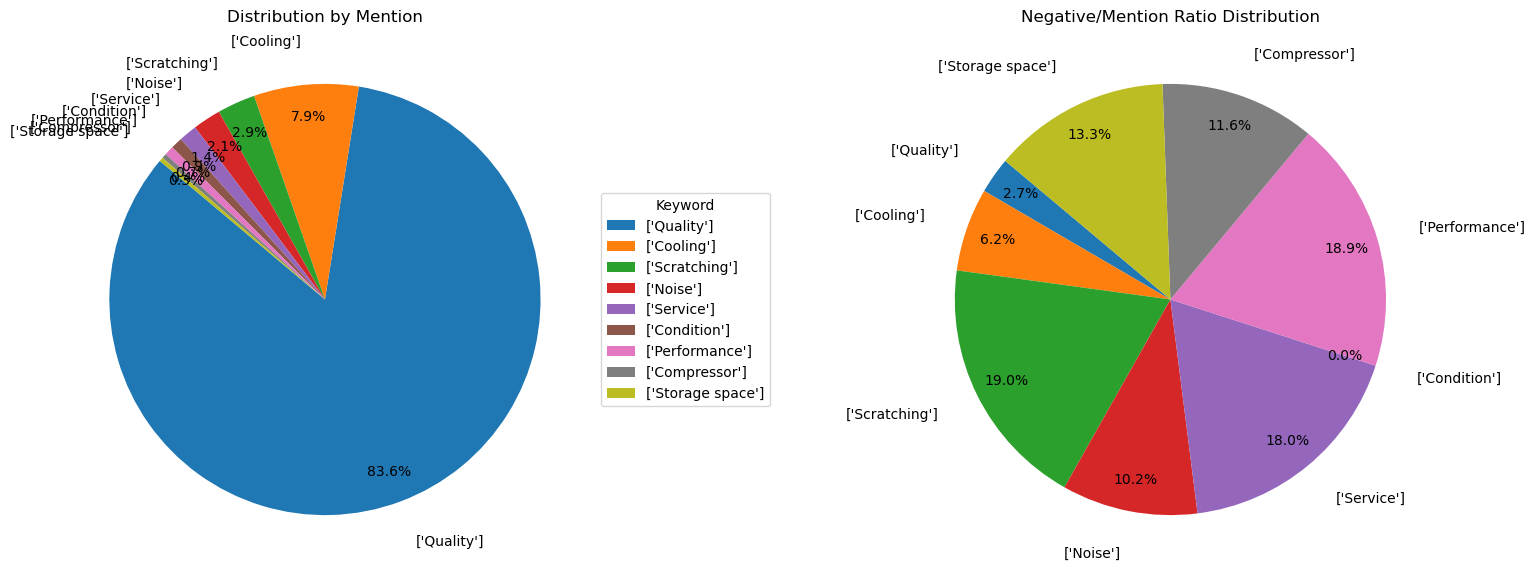

In [66]:
# 첫 번째 파이 차트: mention 기준
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 차트
wedges1, texts1, autotexts1 = plt.pie(menmax['mention'], labels=menmax.index, autopct='%1.1f%%', startangle=140, 
        pctdistance=0.85, labeldistance=1.2)
plt.title('Distribution by Mention')
plt.legend(wedges1, menmax.index, title="Keyword", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


# 두 번째 파이 차트: negative/mention 비율 기준
menmax['neg_mention_ratio'] = menmax['negative'] / menmax['mention']

plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 차트
plt.pie(menmax['neg_mention_ratio'], labels=menmax.index, autopct='%1.1f%%', startangle=140, 
        labeldistance=1.2, pctdistance=0.85)
plt.title('Negative/Mention Ratio Distribution')

plt.show()